### Resumo livro - Approaching (almost) any Machine Learning Problem


# Métricas de Avaliação

Quando vamos desenvolver algoritmos de machine learning, podemos utilizar diversas métricas de avaliação. Algumas vezes, criamos métricas novas para atender uma necessidade de compreensão para o negócio. Nesse notebook, vamos avaliar as métricas mais comums que podem ser usadas nos mais variados tipos de problemas.

Importante notar que trataremos apensa de métricas de avaliaçao para algotirmos supervisionados devido a grande abundancia desse tipo de problema na indústria e o fato das métricas de avaliação de problemas não supervisionados são um pouco subjetivas.

### As métricas mais usadas para problemas de Classificação são:
* Accuracy 
* Precision (P)
* Recall (R)
* F1 score (F1)
* Area under the ROC (Roceiver Operating Characteristic) curve ou AUC 
* Log Loss
* Precision at k (P@k)
* Average Precision at k (AP@k)
* Mean Average Precision at k (MAP@k)

### As métricas mais usadas para problemas de Regressão são:
* Mean Absolute Error (MAE) 
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* Root Mean Squared Logarithmic error (RMSLE)
* Mean Percentage Error (MPE) 
* Mean Absolute Percentage Error (MAPE)
* R²


Saber trabalhar com as métricas mensionadas acima não a única coisa que nós devemos saber. Além disso, devemos saber quando usar quando usar cada uma delas, e isso depende do tipo de dados que temos e do target em questão. 

*Nota: O autor mensiona que se "preocupa" mais com os targets e menos com os tipos de data para saber qual métrica escolher*

Para entender um pouco sobre as métricas, vamos começar com um problema simples de classificação. Vamos supoer que temos um problema de classificação binária ( apenas dois targets) e tal problema consiste em classificar imagens de raio-X toráxica. Temos imagens de raio-x sem problema algum e outras com pneumatorax. Nossa tarefa é montar um algoritmo de classificação que dada uma imagem de raio-x, consiga detectar a presença de pneumatorax. 

.

<img src = 'imagens/pneumotorax.jpg'/>

...

Vamos assumir que temos dados balanceados, ou seja, o número de casos com pneumatorax é igual ao número de casos sem o problema. Se tivermos 100 casos positivos, então teremos 100 casos negativos também.
 

Primeira coisa a se fazer é separar os dados em dois sets iguais de 100 imagens ( set de treino e de validação). Em cada um dos sets, teremos 50 casos positivos e 50 casos negativos para garantir o balanceamento das classes.

> ### Quando temos o mesmo número de classes positivas e negativas num problema de classificação binário,nós usamos as seguintes métricas:
> * Accuracy
> * Precision
> * Recall
> * F1


## Accuracy ou Acurácia

**Accuracy** ou acurácia é a métrica mais simples usada em machine learning. É definido como o quão preciso o modelo é em geral. Para o problema anterior, se a gente constroi um modelo que classifica **90 imagens corretamente**, nossa **accuracy (ou acurácia) é de 90% ou 0.9**. Se somente 83 imagens são classificadas corretamente, a accuracy é de 83% ou 0.83.

### Vamos calcular accuracy com Python:

In [1]:
    def accuracy(y_true, y_pred):
    # Inicializa o contador para previsões corretas
    correct = 0
    
    # loop sobre todos elementos de y_true e y_pred 
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct += 1
    
    # retorna o avalor da accuracy que é a quantidade de previsões corretas sobre o total
    return (correct/ len(y_true))


In [2]:
y_true = [0,1,1,1,0,0,0,1]
y_pred = [0,1,0,1,0,1,0,0]

accuracy_ = accuracy(y_true, y_pred)
print(f"Accuracy : {accuracy_}")

Accuracy : 0.625


* Povemos também realizar o cálculo da acurácia com o scikit-learn:

In [3]:
from sklearn import metrics
y_true = [0,1,1,1,0,0,0,1]
y_pred = [0,1,0,1,0,1,0,0]

accuracy_sklearn = metrics.accuracy_score(y_true,y_pred)

print(f"Accuracy : {accuracy_sklearn}")

Accuracy : 0.625


---

### Dataset Desbalanceado

Agora vamos considerar que temos um dataset desbalanceado com 180 imagens de pacientes que não possuem pneumatórax e apenas 20 que possuem.Mesmo para esse caso, nós iremos criar os datasets de treinamento e validação com as mesmas proporções de targets positivos e negativos. Em cada set, teremos 90 imagems sem pneumatórax e 10 imagens com pneumatórax. *Para a situação em questão, se você disser que todas as imagens do set de validação são de pacientes que não possuem pneumatórax, a acurácia seria de 90%!*

É notório que temos classes desbalanceadas com uma delas significativamente maior que a outra.**Nesse caso, não é recomendado usar a acurácia como métrica de avaliação pois ela não é representativa para os dados em questão**. Mesmo que tenhamos uma acurácia grande, o modelo provavelmente terá uma performance pobre quando for aplicado para dados de produção e você terá sérios problemas para explicar para o seu gerente o motivo.

**Em casos como esse, é melhor olhar para outras métricas como por exemplo a precision.**

Antes de falar em precision, vamos entender outros termos importantes. Vamos assumir que imagem com pneumatórax são da classe positiva (1) e imagens sem são da classe negativa (0).

**True Positive (TP) ou Verdadeiro Positivo (VP)**: Dada uma imagem, se o modelo prever que tal imagem possui pneumatórax e o valor de target da imagem mostra que o paciente realmente possui pneumatórax, é considerado true positive ou verdadeiro positivo.

**True Negative (TN) ou Verdadeiro Negativo (VN)**: Dada uma imagem, se o modelo prever que essa imagem não possui pneumatórax e a imagem é de um paciente que realmente não possui pneumatórax, é considerado True Negative.

Resumindo:
* *Se o modelo prever corretamente classe positiva, é* **True Positive**
* *Se o modelo prever corretamente classe negativa, é* **True Negative**

**False Positive (FP) ou Falso Positivo**: Dada uma imagem, se o modelo prever pneumatórax porém a imagem é de um paciente sem pneumatórax, é um False Positive.

**False Negative (FN) ou Falso Negativo**: Dada uma imagem, se o modelo prever que a imagem não é de paciente com pneumatórax, porém o paciente possui pneumatórax, é um False Negative.

Resumindo:
* *Se o modelo prever incorretamente classe positiva, é* **False Positive**
* *Se o modelo prever incorretamente classe negativa, é* **False Negative**


### Vamos olhar a implementação em python dos conceitos apresentados acima

In [4]:
def true_positive(y_true, y_pred):
    true_pos = 0
    for yt,yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            true_pos += 1
    
    return true_pos

In [5]:
def true_negative(y_true,y_pred):
    true_neg = 0
    for yt,yp in zip(y_true,y_pred):
        if yt == 0 and yp ==0:
            true_neg += 1
            
    return true_neg

In [6]:
def false_positive(y_true, y_pred):
    false_pos = 0
    for yt,yp in zip(y_true, y_pred):
        if yt == 0 and yp ==1:
            false_pos += 1
            
    return false_pos

In [7]:
def false_negative(y_true, y_pred):
    false_neg = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            false_neg += 1
            
    return false_neg

*Nota: As funções aplicadas acima funcionam apenas para classificação binária.*

In [8]:
true_Y = [0,1,1,1,0,0,0,1]
y_Pred = [0,1,0,1,0,1,0,0]

In [9]:
true_positive(true_Y, y_Pred)

2

In [10]:
false_positive(true_Y, y_Pred)

1

In [11]:
false_negative(true_Y, y_Pred)

2

In [12]:
true_negative(true_Y, y_Pred)

3

Se formos definir **Accuracy** com os termos apresentados acima, nós teríamos:

\begin{equation*}
Accuracy Score = \frac{ (TP + TN)}{(TP + TN+FP + FN)}\\
\end{equation*}

Agora que conhecemos todos esses conceito, podemos calcular a acurácia usingo TP, TM, FP, e FN em python.

In [13]:
def accuracy_v2(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    
    accuracy = (tp + tn)/(tp + tn + fp + fn)
    return accuracy    

> Agora vamos comparar os resultados com a versao do *scikit-learn*

In [14]:
y_true = [0,1,1,1,0,0,0,1]
y_pred = [0,1,0,1,0,1,0,0]

accuracy_1 = accuracy(y_true, y_pred)
print('Accuracy Versão 1: ', accuracy_1)

accuracy_2 = accuracy_v2(y_true, y_pred)
print('Accuracy Versão 2: ', accuracy_2)

from sklearn import metrics
accuracy_scikit_learn = metrics.accuracy_score(y_true, y_pred)
print('Accuracy Versão sklearn: ', accuracy_scikit_learn )

Accuracy Versão 1:  0.625
Accuracy Versão 2:  0.625
Accuracy Versão sklearn:  0.625


Ótimos, agora vimos três maneiras de calcular acurácia e estão todas dando o mesmo resultado.

Agora vamos conhecer melhor e avaliar outras métricas.



A primeira será **Precision**.

---

## Precision

\begin{equation*}
Precision = \frac{ TP }{(TP +FP)}\\
\end{equation*}

Vamos supor que construímos um novo modelo em dados que também são desbalanceados. Diante dessas condições, nosso modelo identificou corretamente 80 casos de não pneumatórax num total de 90 e 8 casos de pneumatórax num total de 10. Consequentemente, o modelo identificou corretamente 88 imagens num total de 100. A **acurácia** nesse caso é de 0,88 ou 88%.

Porém do total de 100 imagens, 10 images sem pneumatórax são classificadas incorretamente como casos com pneumatórax. Além disso, 2 casos de pneumatórax foram  classificados incorretamente como sem pneumatórax.

Diante disso, temos:
>  - TP: 8
>  - TN: 80
>  - FP: 10
>  - FN: 2

Nossa **Precision** será:
    
\begin{equation*}
Precision = \frac{ 8 }{(8 +10)}= 0,444\\ 
\end{equation*} 

> **Isso significa que nosso modelo está correto 44% das vezes quando tenta identificar casos de pneumatórax.**

Agora podemos aplicar precision em python:
    

In [15]:
def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    
    return precision

In [16]:
y_true = [0,1,1,1,0,0,0,1]
y_pred = [0,1,0,1,0,1,0,0]

precision_ = precision(y_true, y_pred)
print('precision:', precision_)

precision: 0.6666666666666666


Agora podemos analisar **Recall**

---

## Recall

**Recall** é definido como:
    
\begin{equation*}
Recall = \frac{ TP }{(TP + FN)}\\ 
\end{equation*}

Nossa **Recall** será:
    
\begin{equation*}
Precision = \frac{ 8 }{(8 + 2)}= 0,80\\ 
\end{equation*}

> **Isso significa que nosso modelo identificou 80% dos casos positivos de pneumatórax corretamente**

 Vamos aplicar o cálculo em python.

In [17]:
def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    recall = tp/ (tp + fn)
    
    return recall

In [18]:
y_true = [0,1,1,1,0,0,0,1]
y_pred = [0,1,0,1,0,1,0,0]

recall_ = recall(y_true, y_pred)
print('recall:', recall_)

recall: 0.5


Para um bom modelo de machine learning, os valores de precision e recall precisam ser altos. Podemos observar isso no caso anterior, o valor de recall é 'um pouco' alto. Em contrapartida o valor de precision é muito baixo!

Nosso modelo reproduz bastante falso positivos porém menos faso negativos. Poucos casos de falso negativos é bom nesse tipo de problema pois não queremos dizer que um paciente não possui pneumatórax quando na verdade ele possui. Isso pode proporcionar sérios problemas ! Porém ainda temos bastante falso positivos e isso também pode ser um problema.

grande parte dos modelos prevê probabilidade. Nessas predições nós geralmente escolhemos um threshold de 0,5. Esse limite (threshold) nao é sempre ideal e dependendo do valor escolhido para esse limite, os valores de precision e recall podem mudar drasticamente. Se para cada threshold que a gente escolher, calcularmos os valores de precision e recall, nos criamos uma

## Curva de Precision e Recall

Vamos assumir que temos duas listas:
* y_true: os valores de targets
* y_pred: Valores de probabilidade da amostra em questão ser da classe 1

Agora vamos olhar as probabilidades de predições ao invés do valor que foi predito ( o que é calculado na grande maioria das vezes considerando um limite de 0.5)

In [19]:
y_true = [0,0,0,1,0,0,0,0,0,0,
          1,0,0,0,0,0,0,0,1,0]


y_pred = [.02638412, 0.11114267, 0.31620708, 
            0.0490937, 0.0191491, 0.17554844, 
            0.15952202, 0.03819563, 0.11639273, 
            0.079377, 0.08584789, 0.39095342, 
            0.27259048, 0.03447096, 0.04644807, 
            0.03543574, 0.18521942, 0.05934905, 
            0.61977213, 0.33056815]

In [20]:
print(len(y_true))

print(len(y_pred))

20
20


In [21]:
precisions = []
recalls = []

# limites ou thresholds
thresholds = [0.0490937, 0.05934905, 0.079377,
              0.08584789, 0.11114267, 0.11639273, 
              0.15952202, 0.17554844, 0.18521942, 
              0.27259048, 0.31620708, 0.33056815, 
              0.39095342, 0.61977213] 

# Para cada threshold, vamos calcular a predição em binário
# e guardar os valores de precision e recall em duas listas distintas

# Para cada valor dentro da lista y_pred, vamos verificar se esse valor é maior 
# ou igual a cada valor da lista de threshold. Se for, temp+prediction
# adiciona 1 a lista, caso contrário adiciona 0
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]

    p = precision(y_true, temp_prediction)
    r = recall( y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

                        

Vamos agora plota os valores de precision e recall.

### A curva

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize = 15)
plt.show()

<Figure size 600x600 with 1 Axes>

A cuva acima de precision e recall pode parecer diferente do que você está familiarizado a ver. Essa diferença ocorre devido ao fato de termos somente 20 dados com apensas 3 valores positivos. Porém não se preocupe, ela é a mesma curva de precision e recall que você está acostumado a ver pela internet.

**A figura acima mostra que é difícil escolher um valor de threshold que nos de um bom valor de precision e recall.**

Se o limite (threshold) é muito alto, teremos um pequeno número de dados **True Positive** e um **grande valor de falso negativo**. Isso diminui o valor de **Recall**, apensar disso o score de precision será mais alto.

Por outro lado, se escolhermos um valor muito pequeno de threshold, o número de **false positives** irá crescer siginificativamente e a **precision** será menor.

Esses valores de precision e recall variam entre 0 a 1 e quanto mais o score for próximo de 1, melhor !

**F1 Score é a métrica que combina precision e recall.** É definida como uma média ponderada simples ou média harmônica da precision e do recall. Se considerarmos precision como P e recall como R, Podemos representar a **F1 Score** como:




**F1 Score** 
    
\begin{equation*}
F1 = \frac{ 2PR }{(P+ R)}\\ 
\end{equation*}

Com um pouco de matemática chegamos a:

\begin{equation*}
F1 = \frac{ 2TP }{(2TP + FP + FN)}\\ 
\end{equation*}

Em python temos:
    

In [23]:
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    
    f1_score = 2*p*r/ (p + r )
    return f1_score

In [24]:
y_true = [0,0,0,1,0,0,0,0,0,0,
         1,0,0,0,0,0,0,0,1,0]


y_pred = [0,0,1,0,0,0,1,0,0,0,
         1,0,0,0,0,0,0,0,1,0]

f1(y_true,y_pred)

0.5714285714285715

> Comparando com scikit-learn:

In [25]:
from sklearn import metrics
metrics.f1_score(y_true, y_pred)

0.5714285714285715

Ao invés de olhar para precision e recall individualmente, nós podemos apenas olhar para o F1 score. Assim como precision, recall e accuracy, o F1 score varia de 0 a 1 e um modelo perfeito teria F1 igual a 1. **Quando lidamos com datasets com classes desbalanceadas, nós devemos olhar para F1 (ou recision e recall) ao invés de olhar a acurácia.

---



### True Positive Rate (TPR) e False Positive Rate (FPR)

Existem outros termos importantes que precisamos saber que são **TPR ou True Positive Rate** e **FPR ou False Positive Rate**. Estes serão apresentados agora.

### True Positive Rate (TPR)

 **TPR** 
    
\begin{equation*}
TPR = \frac{TP}{(TP+ FN)}\\ 
\end{equation*}

Apesar da TPR ser a mesma coisa que Recall, vamos fazer uma função python para ela.

* TPR ou Recall também é conhecido como **Sensitivity**

In [26]:
def tpr(y_true, y_pred):
    return recall(y_true, y_pred)

### False Positive Rate (FPR)

 **FPR** 
    
\begin{equation*}
FPR = \frac{FP}{(TN + FP)}\\ 
\end{equation*}

In [27]:
def fpr(y_true,y_pred):
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp/(tn + fp)


### True Negative Rate ou Specificity 

 **True Negative Rate ou Specificity** 
    
\begin{equation*}
FPR = 1- \frac{FP}{(TN + FP)}\\ 
\end{equation*}

São realmente muitos termos porém **os mais importantes são apenas TNR e FPR**

## Curva ROC 

Vamos considerar que temos 15 dados e que os valores de targets são binários.



y_true = [ 0,0,0,0,1,0,1,0,0,1,0,1,0,0,1 ]

Vamos assumir que treinamos um modelo random forest, e temos a probabilidade de um determinado dado ser da classe positiva.

prababilidade de ser 1 : [ 0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99 ] 

Para um valor de threshold  maior igual 0.5, nós podemos avaliar todos os valores de precision, recall/TPR, F1 score e FPR. Porém, Podemos fazer a mesma avaliação para diferentes valores de threshold. De fato, podemos escolher qualquer valor de 0 a 1 para calcular todas as métricas mensionadas.

Vamos fazer essa avaliação levando em consideração somente duas métricas: TPR e FPR

In [28]:
tpr_list = []
fpr_list = []

# Valor de target real
y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]


# Probabilidade do ser da classe positiva (1)
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99] 

# Threshold 
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0] 
 
for thresh in thresholds:
    # Calcula a previsão para cada threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # True Positive Rate
    temp_tpr = tpr(y_true, temp_pred)
    # False Positive Rate 
    temp_fpr = fpr(y_true, temp_pred) 
    # Inclui na lista 
    tpr_list.append(temp_tpr) 
    fpr_list.append(temp_fpr)
    

In [29]:
import pandas as pd
values = {"threshold":thresholds,"tpr":tpr_list,"fpr":fpr_list}
tpr_fpr_df  = pd.DataFrame(values)
tpr_fpr_df

,threshold,tpr,fpr
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


Se usarmos os valores da tabela acima para fazer um plot com TPR no eixo Y e FPR no eixo X, teremos a seguinte curva.

Text(0, 0.5, 'TPR')

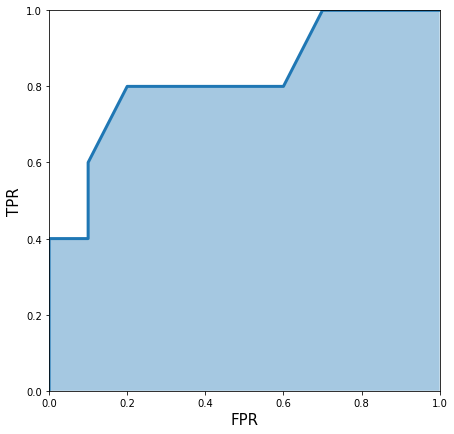

In [30]:
plt.figure(figsize=(7,7))
plt.fill_between(fpr_list, tpr_list, alpha = 0.4)
plt.plot(fpr_list, tpr_list, lw = 3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel("FPR", fontsize = 15)
plt.ylabel("TPR", fontsize = 15)

Essa curva é conhecida como **Receiver Operating Characteristic (ROC)**. Se calcularmos a área dentro da curva, nós então estaremos calculando uma nova métrica que é muito usada quando temos um dataset com classes binárias desbalanceados.

Essa métrica é conhecida como Area Under ROC curve ou Area Under the Curve ou AUC. Existem muitas maneiras de calcular essa área. Nós iremos usar o scikit learn.

**Os valores de AUC variam de 0  a 1.**
* **AUC = 1** significa que temos um modelo perfeito. Na maioria das vezes, isso significa que tivemos algum erro com a validação e devemo analisar nosso preprocessamento e nossa pipeline de validaçao novamente.

* **AUC = 0** significa que nosso modelo é muito ruim. Tente investigar as probabilidades para cada casse, por exemplo, se a probabilidade para uma classe positiva é p, tente substituir esse valor por 1-p. Esse tipo de AUC pode também signigicar que existem alguns problemas com o validation ou data processing.

* **AUC = 0.5** significa que as predições estão sendo feitas de forma randomica ou aleatória.

Se o valor de AUC cai dentro do intervalo [0 , 0.5], significa que o modelo está pior do que aleatório. Muitas vezes, esses valores são encontrados quando invertemos as classes dos nossos dados. Nesse caso, se a gente tentar inverter as predições, os valores de AUC provavelmente ficarão maiores que 0.5. **Quanto maior o valor da AUC, ou seja, quanto mais perto do 1, melhor!**

Vamos relembrar daquele nosso problema do pneumatórax. Imagine que ao criar um modeo que detecta pneumatórax em um paciente, o mesmo apresente um AUC de 0.80. O que isso significa? 
Um AUC de 0.80 significa que se a gente selecionar aleatoriamente uma imagem com pneumatórax - classe positiva - do nosso dataset e outra imagem aleatóia sem pneumatórax - classe negativa -, então a imagem com pneumatórax terá um rank maior do que a imagem sem pneumatórax com a probabilidade de 0.85.

Depois que a gente calcular as probabilidades das classes e o AUC, nós iremos fazer as previsões com os dados de teste. Nós podemos usar tanto probabilidades quanto a classe para avaliar. A escolha da saída gerada vai depender do caso e do problema em questão. No caso de usar somente probabilidades, sem problemas pois a saida do modelo já pode nos dar isso sem problemas. Caso a gente queira ter a classe de saída, nós devemos especificar um **threshold**. Para o caso de classificação binária, podemos fazer o seguinte:




  
\begin{equation*}
classe-predita = Probabilidade >= Threshold \\ 
\end{equation*}

Isso nos dará uma lista que contém apenas valores binários - 1 se probabilidade maior igual ao threshold e 0 caso contrário.

> **A pergunta que fica é: Como podemos calcular esse valor de threshold ?**

E como você já deve ter imaginado, nós podemos usar a curva ROC para avaliar como o valor de threshold impácta o FPT e o TPR e consequentemente os valores de FP(False Positive) e TP(True Positive). Tal análise depende tanto do tipo de negócio quanto do dataset, e , tendo isso em mente, devemos escolher o melhor valor de threshold que satisfaça as condicões de negócio e dos dados em questão.

Por exemplo, se você não quer ter muitos false positives (FP), você deve escolher um threshold mais alto. Por outro lado, isso também fará com que tenha muito mais false netatives (FN). Fique atendo a esse trade-off e escolha com sabedoria.

Agora vamos analisar como os valores de threshold impactam os valores de TP e FP.




In [31]:
# listas vazias para guardar valores de TP e FP
tp_list = []
fp_list = []

# Valores de target
y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]


# Probabilidades preditas da observação ser da classe 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99] 

# threshold escolhido a mão
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]


for thresh in thresholds:
    # Calcula previsão para um dado valor de threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # tp e fp
    temp_tp = true_positive(y_true, temp_pred)
    temp_fp = false_positive(y_true, temp_pred)
    
    # add to list
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

In [32]:
import pandas as pd 
data = {'threshold':thresholds, "tp":tpr_list, "fp": fpr_list}

threshold_tp_fp_df = pd.DataFrame(data) 
threshold_tp_fp_df

,threshold,tp,fp
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


Em muitos casos, o valor de ROC que fica na parte superior esquerda nos dá um threshold muito bom, como mostrado na figura abaixo. Como mostrado na imagem abaixo.


Text(0.6, 0.5, ' Possível melhor Threshold')

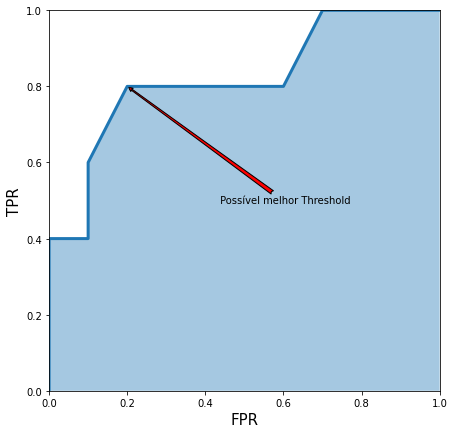

In [33]:

plt.figure(figsize=(7,7))
plt.fill_between(fpr_list, tpr_list, alpha = 0.4)
plt.plot(fpr_list, tpr_list, lw = 3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel("FPR", fontsize = 15)
plt.ylabel("TPR", fontsize = 15)
plt.annotate(' Possível melhor Threshold',
            xy= ( 0.2, 0.8),
            arrowprops=dict(arrowstyle='fancy', facecolor='red'
                           ),
            xytext = (0.6,0.5),
            ha='center',
            va='center')




Analisando a tabela e a Curva ROC, podemos notar que o threshold de cerca de 0.6 é um bom valor a ser escolhido. Nesse caso, nós não perdemos muitos true positives nem temos muitos casos de falsos negativos.

AUC é muito utilizado quando temos dados binários com classes desbalanceadas e é uma métrica que definitivamente todos deveriam saber. Uma vez que você entende o conceito por trás do AUC - apresentados anteriormente - se torna relativamente facil de explicar o conceito para pessoas não técnicas que irão utilizar o seu modelo na indústria.


## Log-Loss

Agora que entendemos sobre a AUC, podemos analisar a **log loss**. No caso de problema de classificação binária, a formlua é :


  
\begin{equation*}
Log Loss = -1.0*(target * log(prediction) + (1-target) * log(1-prediction))\\ 
\end{equation*}

Onde:
* target é 1 ou 0
* prediction é a prababilidade da amostra ser da classe 1

Importante notar que log loss penaliza bem por predição errada ou muito longe do valor real. Isso signigica que a **Log Loss nos pune por ter muita certeza e muito errado**

In [34]:
import numpy as np

def log_loss(y_true, y_proba):
    epsilon = 1e-15
    loss = []
    
    for yt, yp in zip(y_true, y_proba):
        # ajuste de probabilidade
        # 0 é convertido em 1e-15
        # 1 é convertido em 1 - 1e-15
        yp = np.clip(yp, epsilon, 1 - epsilon)
        
        temp_loss = - 1.0 * ( yt * np.log(yp) + (1 - yt) * np.log(1 - yp ))
        loss.append(temp_loss)
        
    return np.mean(loss)

In [35]:
y_true = [0, 0, 0, 0, 1, 0, 1,0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

log_loss(y_true,y_proba)



0.49882711861432294

Utilizando scikit learn:

In [36]:
from sklearn import metrics

metrics.log_loss(y_true,y_proba)

0.49882711861432294

Como podemos ver, nossa aplicação de log loss bate com o valor gerado com scikit learn. Um dos problemas do log loss é sua dificuldade de interpretar os resultados. Além disso, outro fato relevante é que nós precisamos lembrar que essa métrica gera mais penalidade que as outras métricas

Por exemplo, se você tem 51% de certeza com relação a uma amostra pertencer da classe positiva, a log loss será :

  
\begin{equation*}
Log Loss = -1.0*(1 * log(0.51) + (1-1) * log(1-0.51)) = 0.67\\ 
\end{equation*}

E se você tiver 49% de certeza de que uma amostra pertence a classe 0, a log loss será:

\begin{equation*}
Log Loss = -1.0*(1 * log(0.49) + (1-0) * log(1-0.49)) = 0.67\\ 
\end{equation*}

Mesmo considerando um cut-off de 0.5 e tendo uma previsão perfeita, nós ainda teremos uma log loss muito alta. Então, quando estiver trabalhando com essa métrica, devemos ter bastante atenção.

## Classificação multiclasse 

Muitas das métricas mencionadas previamente podem ser convertidas para problemas com várias classes. Vamos analisar precision e recall. Para problemas multi classes, nós podemos calcular essas métricas para cada classe em questão. 

Existem diferentes maneiras de calcular essas métricas. Primeiramente, vamos tralhar com precision. Como sabemos, precision depende de True positive e false positive.

* Macro averaged precision: Calcula a precision para todas as classes individualmente e depois faz a média

* Micro avaraged precision: Calcula true positives e false positives das classes e depois usa esse cálculo para calcular a precision total

* Weighted precision: Similar a Macro precision considera média ponterada das classes, dependendo do número de itens em cada class.

Vamos começar implementando em python o macro-average precision.

In [39]:
import numpy as np
def macro_precision(y_true, y_pred):
    
    # Number of classes
    num_classes = len(np.unique(y_true))
    
    precision = 0
    
    for class_ in range(num_classes):
        # Todas as classes exceto a atual é considerada negativa
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        
        # precision para a classe em questao
        temp_precision = tp/(tp +fp )
        
        precision += temp_precision
        
    # the ogeral precision
    precision /= num_classes
    return precision
